In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tools.basic.loadsavejson import loadjson
import glob
from model.post.post_processing import post_processing
import pandas as pd
from functions.plots import evolutions



In [2]:
results_exp      = loadjson("../T01_preprocessing/data/results.json")
results_exp_mono = loadjson("../../../C01_MultiYarn/validation/data/results.json")


In [3]:
df_mono = results_exp_mono["df_exp"]["exp 1"]   
max_mono = df_mono["stress [MPa]"].max()


In [4]:
max_mono

142.44049931436967

In [5]:
paths = glob.glob("output/*/*.json")
paths = ["/".join(path.split("/")[:-1]) for path in paths]
# sort paths 
paths = sorted(list(set(paths)))

In [6]:
paths
df = pd.DataFrame(paths)
df

,0
0,output/2024-01-02__21-06-14__34919
1,output/2024-01-03__08-44-15__16274
2,output/2024-01-03__09-50-32__77741
3,output/2024-01-03__11-23-45__63400
4,output/2024-01-03__13-39-42__82231
...,...
59,output/2024-01-15__15-00-30__34390
60,output/2024-01-15__15-13-58__39110
61,output/2024-01-15__19-32-40__97587
62,output/2024-01-15__19-35-12__59553


In [7]:

ids = [
    "2024-01-11__07-56-31__73545",
    "2024-01-11__12-11-56__79942",
    "2024-01-11__13-46-26__46685",
    "2024-01-11__16-31-57__56287",
    "2024-01-12__09-05-37__50009",
    "2024-01-12__12-23-00__38435",
    "2024-01-12__14-03-34__66865",
    "2024-01-12__18-59-20__90412",
    "2024-01-13__08-39-19__16310",
    "2024-01-13__08-39-19__16310",
    "2024-01-14__18-20-45__89237",
    "2024-01-15__08-55-35__90831",
    "2024-01-15__10-14-53__71725",
    "2024-01-15__13-17-04__56876",
    "2024-01-15__19-35-12__59553",
    "2024-01-16__08-41-44__91826"
]

results = []
for id in ids:
    results.append(post_processing("output/"+id,
                                   force_recompute=False,
                                   max_mono=max_mono))
    
results[-1] = post_processing("output/"+ids[-1],force_recompute=True,max_mono=max_mono)


Read frd
--------------------
Interp section
--------------------
Interpolating section


100%|██████████| 64/64 [00:00<00:00, 130.93it/s]


Interpolating section


100%|██████████| 64/64 [00:00<00:00, 130.30it/s]


Read frd
--------------------
Interp section
--------------------
Interpolating section


100%|██████████| 64/64 [00:00<00:00, 130.87it/s]


Interpolating section


100%|██████████| 64/64 [00:00<00:00, 130.59it/s]


In [8]:
factor_npoints = [ r["lsdyna_params"]["factor_npoints"] for r in results]
ratio_new = [ r["measurements"][-1]["ratio_new"] for r in results]
pressure = [ r["infl_params"]["pressure"] for r in results]
best_ratio =  [r ["best_ratio"] for r in results]
inflation_path = [r["infl_params"]["output_folder"] for r in results]
inflation_path = [path.split("/")[1] for path in inflation_path]

In [9]:
results[0].keys()

dict_keys(['measurements', 'frd', 'infl_params', 'simu_params', 'lsdyna_params', 'best_ratio', 'ind_ms'])

In [10]:
df_main = pd.DataFrame()
# size= factor_npoints , output_folder = ids
df_main["size"] = factor_npoints
df_main["output_folder"] = ids
df_main["last_ratio"] = ratio_new
df_main["last_ratio"] = df_main["last_ratio"].round(2)
df_main["best_ratio"] = best_ratio
df_main["best_ratio"] = df_main["best_ratio"].round(2)
df_main["inflation"] = pressure
df_main["inf_path"] = inflation_path
# sort by ratio
df_main = df_main.sort_values(by=["best_ratio"],ascending=False)


In [11]:
df_main

,size,output_folder,last_ratio,best_ratio,inflation,inf_path
3,0.35,2024-01-11__16-31-57__56287,0.71,0.83,800,2024-01-11__13-39-10__18176
7,0.50,2024-01-12__18-59-20__90412,0.83,0.83,800,2024-01-12__12-09-07__63832
8,0.50,2024-01-13__08-39-19__16310,0.80,0.80,800,2024-01-12__12-09-07__63832
9,0.50,2024-01-13__08-39-19__16310,0.80,0.80,800,2024-01-12__12-09-07__63832
12,0.50,2024-01-15__10-14-53__71725,0.80,0.80,800,2024-01-15__09-58-37__13640
5,0.50,2024-01-12__12-23-00__38435,0.79,0.79,800,2024-01-12__12-09-07__63832
10,0.50,2024-01-14__18-20-45__89237,0.77,0.77,800,2024-01-12__12-09-07__63832
2,0.35,2024-01-11__13-46-26__46685,0.64,0.73,800,2024-01-11__13-39-10__18176
1,0.35,2024-01-11__12-11-56__79942,0.70,0.72,400,2024-01-11__12-04-21__64913
4,0.50,2024-01-12__09-05-37__50009,0.72,0.72,800,2024-01-12__08-52-25__53812


In [12]:
def evolutions(results,id=None):

    n_results = len(results["measurements"])
    # padding 
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    nsq = int(np.ceil(np.sqrt(n_results)))
    if nsq**2 < n_results:
        nsq += 1
    max_sigma = np.max([np.max(r["mt"]) for r in results["measurements"]])

    for j,r in enumerate(results["measurements"]):
        plt.subplot(nsq,nsq,j+1)
        mt,mt_z = r["mt"],r["mt_z"]
        if id is not None:
            plt.plot(mt_z[id],mt[id],'.-')
        else:
            for iyarn in range(len(mt_z)):
                z = mt_z[iyarn]
                plt.plot(z,mt[iyarn],'.-')

        plt.xlabel("z [mm]")
        plt.ylabel("Mean Disk stress (P1)[MPa]")
        plt.ylim([0,200])
        plt.title(results["frd"]["steps"][j])
        plt.ylim([0,max_sigma])

        
        plt.grid()

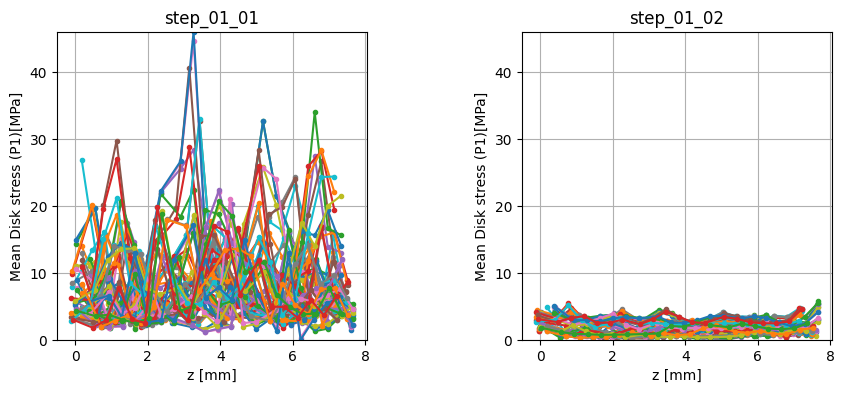

In [13]:
fig = plt.figure(figsize=(10,10))
evolutions(results[-1])


In [14]:
from functions.plots import sigmas

def sigmas(results,name=""):

    step_str =  [ i[:7 ] for i in results["frd"]["steps"] ]
    step_str = np.array(step_str)    
    step_str_uq = np.unique(step_str)
    #
    indx = [ np.where(step_str == iuq )[-1][-1] for iuq in step_str_uq]
    #
    ms_select = [ results["measurements"][i] for i in indx]
    epsilons = [ r["epsilon"]   for r in ms_select]
    F_total  = [ r["F_total"]   for r in ms_select]
    ratio    = [ r["ratio"]     for r in ms_select]
    sigma_max= [ r["sigma_max"] for r in ms_select]
    ratio_new= [ r["ratio_new"] for r in ms_select]
    #
    p = results["infl_params"]["pressure"] 
    nonlinear = results["simu_params"]["nonlinear"]
    nonlinear = "nonlinear" if nonlinear else "linear"
    name = name + " [" + str(p) + " MPa ] | " + nonlinear
    # ==============================================
    #pading
    plt.subplots_adjust(wspace=0.25,hspace=0.25)

    plt.subplot(2,2,1)
    plt.plot(epsilons,ratio,
             label=name,
             marker="o")
    
    plt.xlabel(r"$\epsilon$")
    plt.ylabel("r")
    plt.title("Ratio")
    plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.35),fontsize=7)
    plt.grid()
    # ==============================================
    plt.subplot(2,2,2)

    plt.plot(epsilons,sigma_max,
             label=name,
             marker="o")
    
    plt.xlabel(r"$\epsilon$")
    plt.ylabel(r"$\sigma_{max}$  [MPa]")
    plt.title("Maximun stress of all yarns")
    plt.grid()
    # ==============================================

    plt.subplot(2,2,3)

    plt.plot(epsilons,F_total,label=name,marker="o")

    plt.xlabel(r"$\epsilon$")
    plt.ylabel(r"$F_apl$  [N]")
    plt.title("Total applied force")
    # outside legend
    plt.grid()

    # ==============================================
    plt.subplot(2,2,4)

    plt.plot(epsilons,ratio_new,label="ratio_new" + " " + name,marker="o")
    ratio_exp = 0.82
    # horizontal line
    xlim = plt.gca().get_xlim()
    plt.plot([0,0.5],[ratio_exp,ratio_exp],'--',color="black")
    plt.xlim(xlim)
    plt.xlabel(r"$\epsilon$")
    plt.ylabel(r"$r_{c}$")
    plt.title("Ratio corrected")
    plt.grid()



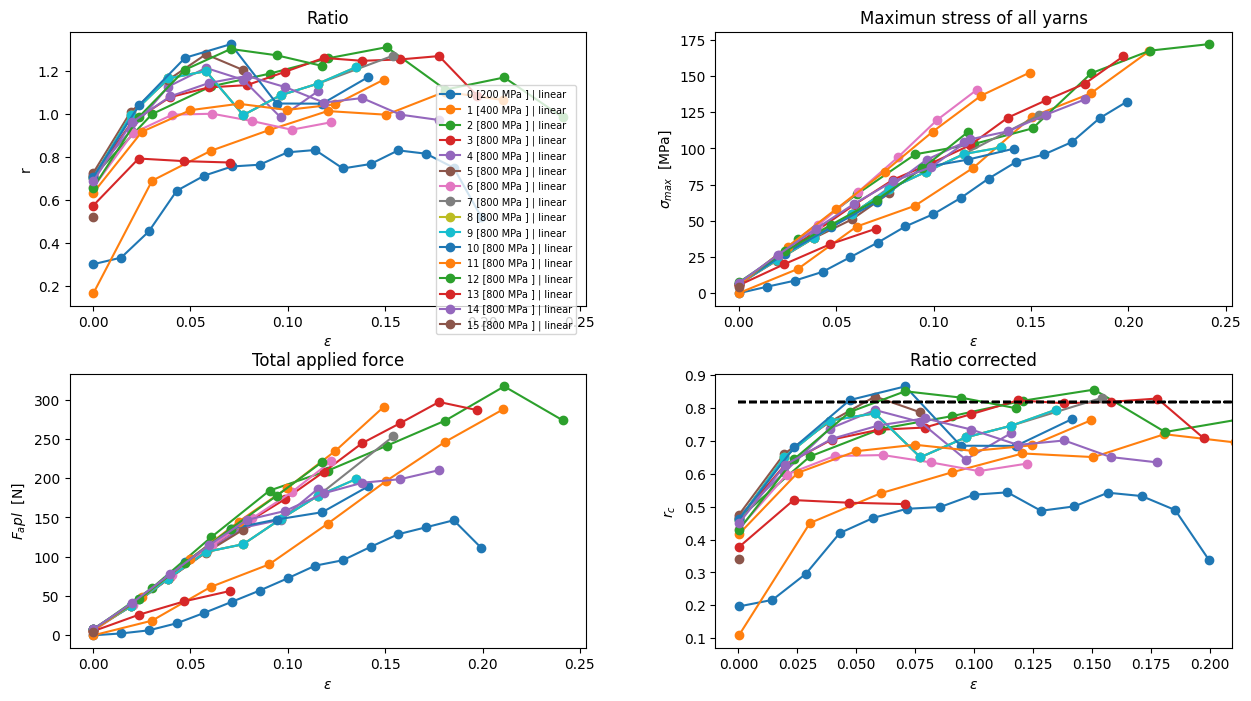

In [15]:
fig = plt.figure(figsize=(15,8))
for i, r in enumerate(results):
    sigmas(r,name=str(i))


In [16]:
from functions.plots import  strain_stress

def strain_stress(results_exp_mono,results_exp,results,index):

    step_str =  [ i[:7 ] for i in results["frd"]["steps"] ]
    step_str = np.array(step_str)    
    step_str_uq = np.unique(step_str)
    #
    indx = [ np.where(step_str == iuq )[-1][-1] for iuq in step_str_uq]
    p = results["infl_params"]["pressure"]
    nonlinear = results["simu_params"]["nonlinear"]
    nonlinear = "nonlinear" if nonlinear else "linear"

    size = results["lsdyna_params"]["factor_npoints"]

    df_mono = results_exp_mono["df_exp"]["exp 1"]
    measurements = results["measurements"]
    ms_select = [ measurements[i] for i in indx]

    epsilons  =  [ r["epsilon"]    for r in ms_select]
    sigma     =  [ r["sigma"]      for r in ms_select]
    sigma_max =  [ r["sigma_max"]  for r in ms_select]
    sigma_tren=  [ r["sigma_tren"] for r in ms_select]
    # ==============================================
    plt.plot(epsilons,sigma_max,
             label  = r"$\sigma_{mono}$",
             marker = "o",
             color  = "red",
             ms     = 5 )
    plt.plot(epsilons,sigma_tren,
             label  = r"$\sigma_{Braid}$",
             marker = "o",
             color  = "green",
             ms     =5 )

    plt.xlabel(r"$\epsilon$")
    plt.ylabel(r"$\sigma \ [MPa]$")
    steps = results["frd"]["steps"]

    for i in range(len(indx)):
        text_text = steps[indx[i]].split("_")
        text_text = "$s_{"+str(text_text[1])+"}"+"^{"+str(text_text[2])+"}$"
        plt.text(epsilons[i],sigma_max[i],
                 text_text,rotation=0,ha="center",va="center")

    plt.plot(results_exp["df_exp_1"]["strain [-]"],
             results_exp["df_exp_1"]["stress [MPa]"],
            label="Braid Exp.",ls="--",color="green")


    # plot df_mono
#     plt.plot(df_mono["strain [-]"],
#              df_mono["stress [MPa]"],
#             label="Mono Exp.",ls="--",color="red")

    max_mono = df_mono["stress [MPa]"].max()
    max_braid = results_exp["df_exp_1"]["stress [MPa]"].max()
    # line
    plt.plot([0,1],[max_mono,max_mono],ls="-",color="red",alpha=0.2)
    plt.plot([0,1],[max_braid,max_braid],ls="-",color="green",alpha=0.2)

    step = results["ind_ms"]
    
    ratio     = results["measurements"][step]["ratio"]
    new_ratio = results["measurements"][step]["ratio_new"]
    
    title = "("+str(index)+")"+" Ratio: "+str(round(new_ratio,2))+\
            " | "+str(p)+" [MPa]" + " (" + nonlinear + ")" + " | " + str(round(size*100)) + "%"
    plt.title(title,fontsize=10)
    plt.grid()
    plt.xlim(0,0.2)
    plt.ylim(0,50)
    plt.legend(fontsize=8)

    #
    # take ylim interval
    e = epsilons[step]
    plt.vlines(e,0,max_mono,color="black",ls="--",alpha=0.5)

    return epsilons

In [17]:
epsilons  =  [ r["epsilon"]    for r in results[-1]["measurements"]]
epsilons

[0.00026049154351381854, 0.00026049154351381854]

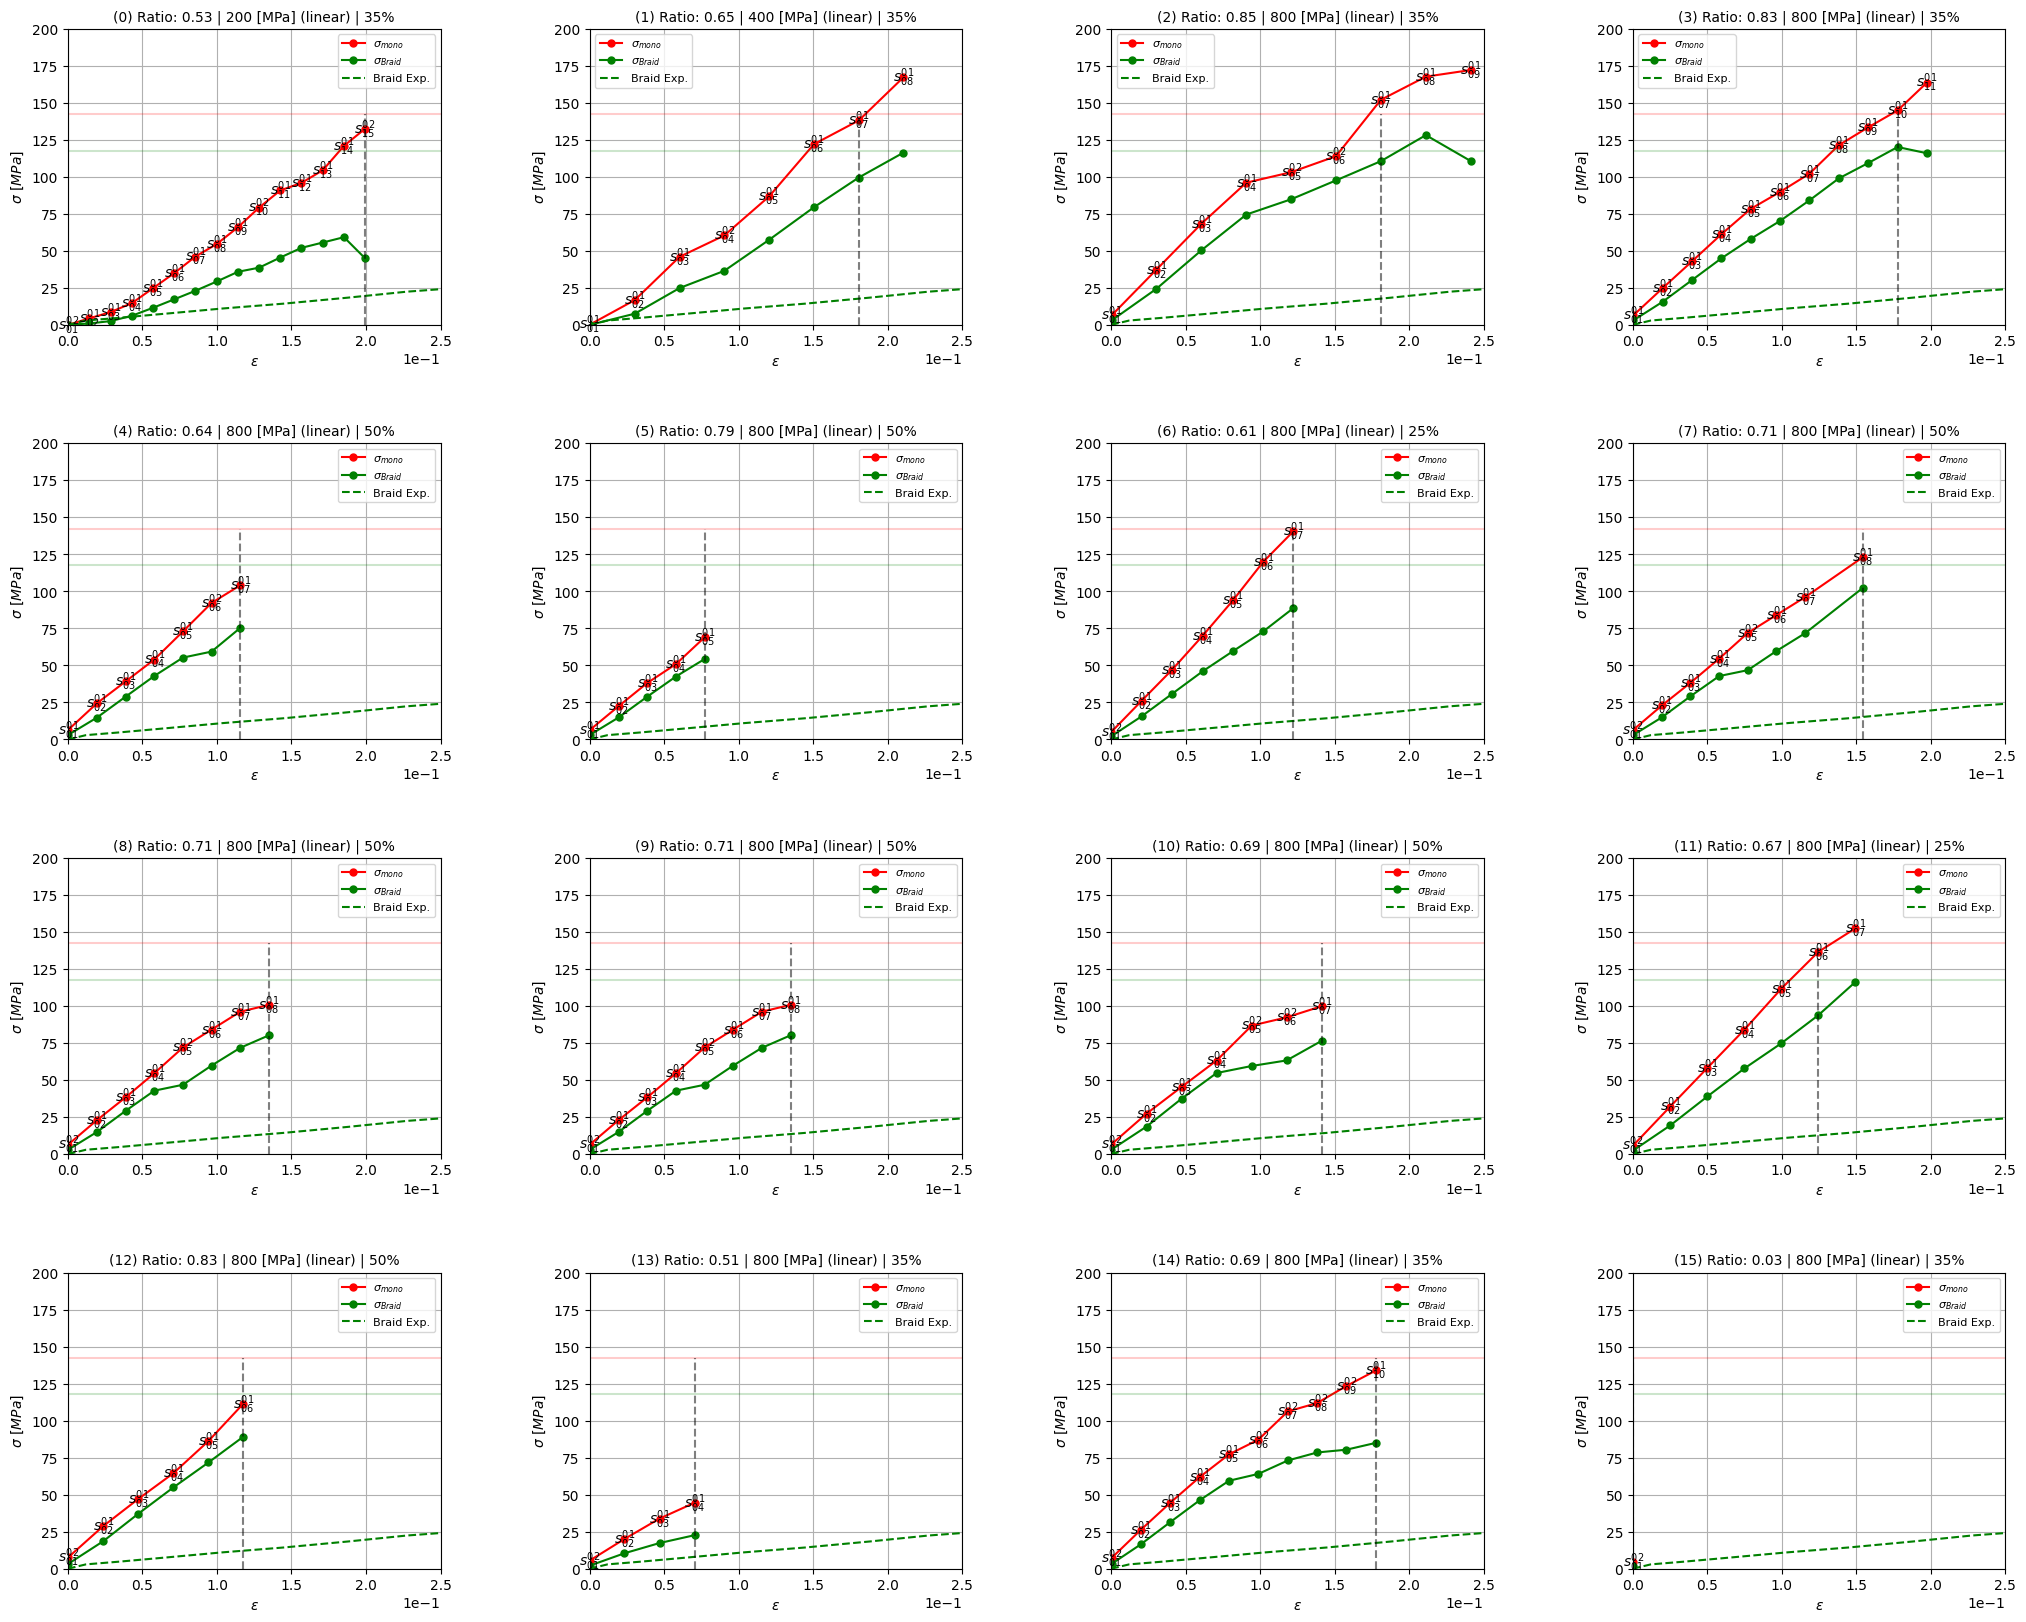

In [18]:

xlim = [0,0.25]
#xlim = [0,1.3]

ylim = [0,200]
fig = plt.figure(figsize=(25,20))
# subplot padding
plt.subplots_adjust(hspace=0.4,wspace=0.4)

for i in range(len(results)):
    plt.subplot(4,4,1+i)
    strain_stress(results_exp_mono,results_exp,results[i],i)
    plt.xlim(xlim)
    plt.ylim(ylim)
    # xticks sciencetific notation
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))


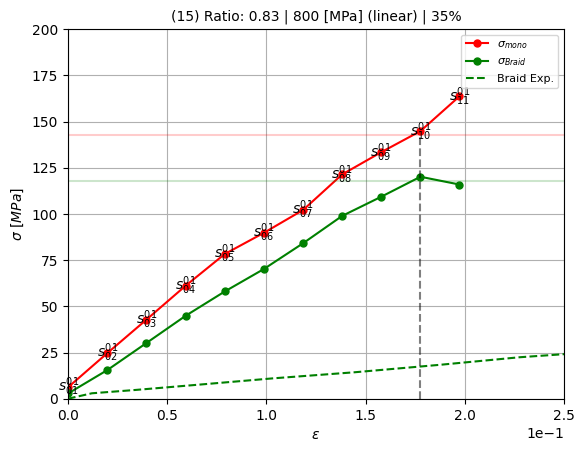

In [19]:

xlim = [0,0.25]
#xlim = [0,1.3]

ylim = [0,200]
fig = plt.figure()
# subplot padding

strain_stress(results_exp_mono,results_exp,results[3],i)
# vertical line
plt.xlim(xlim)
plt.ylim(ylim)
# xticks sciencetific notation
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))


In [25]:
ids[12]

'2024-01-15__10-14-53__71725'

In [21]:
ids[13]

'2024-01-15__13-17-04__56876'

In [22]:
results[10]["simu_params"]

{'nonlinear': False}

In [23]:
results[0]["infl_params"]["output_folder"]

'final/2024-01-10__07-32-31__99756/inflation'

In [24]:
sigma_mono_rot = results_exp_mono["df_exp"]["exp 1"]["stress [MPa]"].values
sigma_mono_rot = np.max(sigma_mono_rot)
#
sigma_tren_rot = results_exp["df_exp_1"]["stress [MPa]"].values
sigma_tren_rot = np.max(sigma_tren_rot)